## Equilíbrio Líquido-Vapor

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Quando se fala em equilíbrio entre as fases líquido e vapor, devem ser observadas 3 condições:
<p> $T^{L}$ = $T^{V}$ </p> <p> $P^{L}$ = $P^{V}$ </p> <p> $\mu^{L}$ = $\mu^{V}$ </p>

Ou seja, deve-se observar o equilíbrio térmico, de momento e de potencial químico.

Nesse notebook serão abordadas as formas de cálculo de ponto de bolha e orvalho com base em T e P usando o modelo de Antoine e, considerando a lei de Raoult. Serão calculados P a partir de T e vice-versa. Serão calculados os pontos de bolha e orvalho, com base em P e depois em T, e, por fim, será plotada a curva do ponto de bolha e de orvalho com temperatura constante e com pressão constante.

Ponto de bolha - Consiste-se no ponto em que a pressão cai o suficiente (ou a temperatura sobe o suficiente) de modo a se observar a primeira bolha de vapor na solução líquida.

Ponto de orvalho - Consiste-se no ponto em que a pressão sobe o suficiente (ou a temperatura cai o suficiente) de modo a se observar a primeira gota de líqudio na solução de vapor. É o que caracteriza o vapor saturado.

Solução binária - Ponto de bolha

Conforme escrito, será utilizada a lei de Raoult para calcular o ponto de bolha e de orvalho. <p> Nessa lei, considera-se que o modelo de gás é o ideal (coeficiente de fugacidade é igual a 1) e o de solução também é ideal (coeficiente de atividade é igual a 1) </p>

### Carregando a tabela e setando o nome do composto como índice

In [72]:
df = pd.read_excel('tabela_antoine.xlsx')
df.set_index('Compound Name',inplace=True)

#### Cabeçalho

In [73]:
df.head()

,Formula,A,B,C,TMIN,TMAX
Compound Name,,,,,,
acetone,C3H6O,7.23160,1277.030,237.23,-32,77
acetic-acid,C2H4O2,7.29960,1479.020,216.82,17,157
acetonitrile,C2H3N,7.07350,1279.200,224.01,-13,117
benzene,C6H6,6.90565,1211.033,220.79,-16,104
butane,C4H10,6.80896,935.860,238.73,-78,19


#### Localizando a acetona

In [78]:
df.loc['acetone']

Formula      C3H6O
A           7.2316
B          1277.03
C           237.23
TMIN           -32
TMAX            77
Name: acetone, dtype: object

#### Localizando o valor de A da acetona

In [79]:
df.loc['acetone']['A']

7.2316

In [83]:
df.loc['acetone'][1:4].values

array([7.2316, 1277.03, 237.23], dtype=object)

### Listando os dados do n-butano e do n-pentano

In [84]:
n_butane =  list(df.loc['butane'][1:4].values)
n_pentane = list(df.loc['pentane'][1:4].values)

T em ºC e P em mmHg - Abaixo é a equação de Antoine

In [85]:
def Antoine(A,B,C,T):
    return 10**(A - B/(T + C))

Definindo a pressão de saturação do n-butano e do n-pentano

In [129]:
T = 20.0 #temperatura em ºC
P2 = Antoine(n_butane[0],n_butane[1],n_butane[2],T)
P1 = Antoine(n_pentane[0],n_pentane[1],n_pentane[2],T)

Equação do ponto de bolha - mistura binária

In [130]:
def Bubble(x,P1,P2):
    P = P1 + (P2 - P1)*x
    return P

Equação do ponto de orvalho - mistura binária

In [131]:
def Dew(y,P1,P2):
    P = 1/((y/P2)+((1 - y)/P1))
    return P

#### Calculando temperatura a partir da pressão

Para esse procedimento, será necessário um método numérico, já que devemos encontrar a raiz de um logaritmo

O primeiro passo é isolar e tornar a equação transcedental igual a zero

$P^{sat}$ - $10^A\frac{- B}{T+C}$ = 0

In [288]:
def f(A,B,C,P,T):
    a = Antoine(A,B,C,T)
    return P - a

O segundo passo é realizar um método numérico para derivadas - diferenças finitas centrais

In [311]:
def derivada(f,A,B,C,P,T):
    df = (f(A,B,C,P,T+0.0001) - f(A,B,C,P,T-0.0001))/0.0002
    return df

Defino os parâmetros A,B,C do butano, a pressão que desejo encontrar a temperatura e um chute inicial de T=10ºC

In [312]:
A,B,C = n_butane[0],n_butane[1],n_butane[2]
P = 760
T0 = 10

Crio o método de Newton Raphson para obter tal valor de raiz, que será a temperatura em que P = $P^{sat}$

In [356]:
def NewtonRaphson(T0,A,B,C,P,tol=1e-6):
    for i in range(200):
        T = T0 - f(A,B,C,P,T0)/derivada(f,A,B,C,P,T0)
        error = abs((T - T0)/T)
        if error<tol:
            break
            return T
        else:
            T0 = T
    return T

In [316]:
round(NewtonRaphson(T0,A,B,C,P),2)

-0.49

No caso, a temperatura em que a pressão de saturação do butano é de 760 mmHg é em -0,49ºC

### Plotando a curva do ponto de bolha e de orvalho - Temperatura fixada

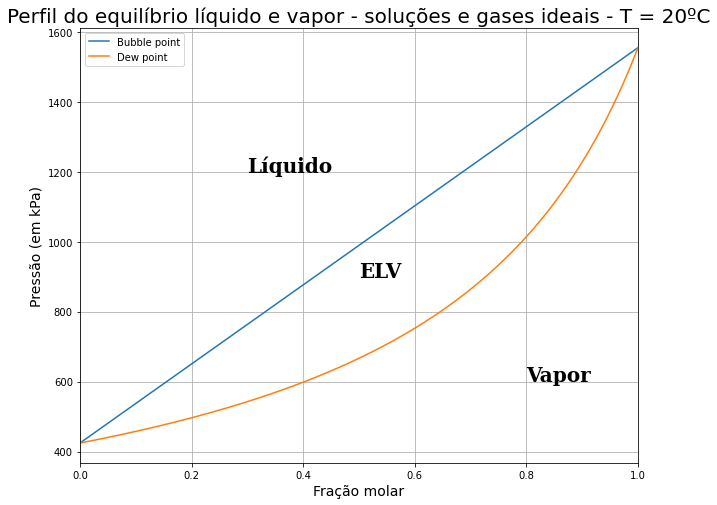

In [416]:
X = np.linspace(0,1,1000)
D = Dew(X,P1,P2)
B = Bubble(X,P1,P2)

font = {'family': 'serif',
        'weight': 'bold',
        'size': 20
        }
plt.figure(figsize=(10,8))
plt.plot(X,B,X,D)
plt.title("Perfil do equilíbrio líquido e vapor - soluções e gases ideais - T = 20ºC",font={'size':'20'})
plt.xlim([0,1])
plt.xlabel("Fração molar de n-butano",font={'size':'14'})
plt.ylabel("Pressão (em kPa)",font={'size':'14'})
plt.legend(["Bubble point","Dew point"])
plt.grid(True)
plt.text(0.3,1200,'Líquido',font = font)
plt.text(0.5,900,'ELV',font = font)
plt.text(0.8,600,'Vapor',font = font)
plt.show()

### Plotando a curva de temperatura, com pressão fixada

In [417]:
X = np.linspace(0.1,0.9,1000)
A,B,C = n_butane[0],n_butane[1],n_butane[2]
A1,B1,C1 = n_pentane[0],n_pentane[1],n_pentane[2]
P = 760 ## pressão de 760 mmHg
T0 = 10 ## temperatura inicial 

In [333]:
PbS = Antoine(A,B,C,20)
PpS = Antoine(A1,B1,C1,20)

In [395]:
def fp(y,P1S,P2S):
    Pf = P - 1/((y/P1S) + ((1-y)/P2S))
    return Pf

In [396]:
def dfp(fp,y,P1S,P2S):
    dff = (fp(y+0.001,P1S,P2S) - fp(y-0.001,P1S,P2S))/0.002
    return dff

In [397]:
def NewtonRaphson2(y0,P1S,P2S,tol=1e-6):
    for i in range(200):
        y = y0 - fp(y0,P1S,P2S)/dfp(fp,y0,P1S,P2S)
        error = abs((y - y0)/y)
        if error<tol:
            break
            return y
        else:
            y0 = y
    return y

In [406]:
Tb = NewtonRaphson(T0,A,B,C,P)
Tp = NewtonRaphson(T0,A1,B1,C1,P)
Tr = np.linspace(Tp,Tb,100)
Pbs = Antoine(A,B,C,Tr)
Pps =  Antoine(A1,B1,C1,Tr)
x = (P - Pps)/(Pbs - Pps)
y0 = 0.9

In [407]:
y = [NewtonRaphson2(y0,Pbs[i],Pps[i]) for i in range(len(Pbs))]

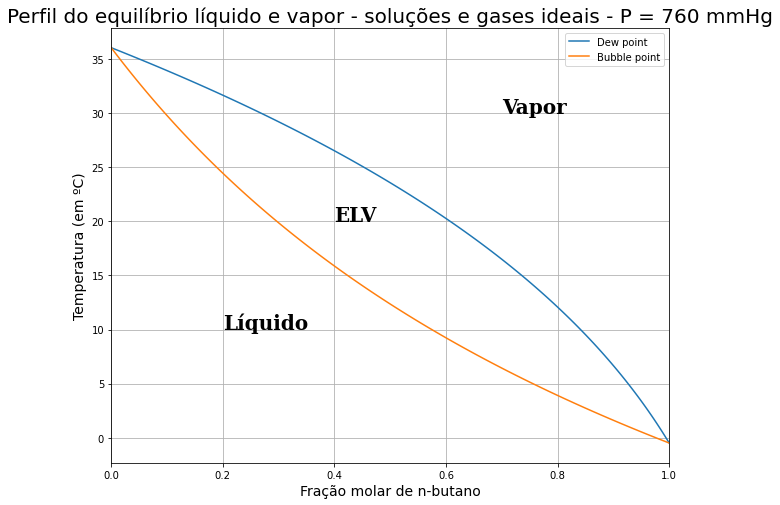

In [420]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 20
        }
plt.figure(figsize=(10,8))
plt.plot(y,Tr,x,Tr)
plt.title("Perfil do equilíbrio líquido e vapor - soluções e gases ideais - P = 760 mmHg",font={'size':'20'})
plt.xlim([0,1])
plt.xlabel("Fração molar de n-butano",font={'size':'14'})
plt.ylabel("Temperatura (em ºC)",font={'size':'14'})
plt.legend(["Dew point","Bubble point"])
plt.grid(True)
plt.text(0.7,30,'Vapor',font = font)
plt.text(0.4,20,'ELV',font = font)
plt.text(0.2,10,'Líquido',font = font)
plt.show()